In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_file = pd.ExcelFile('ECT.xlsx')

In [92]:
PartyList = data_file.parse(sheet_name='result_constituencies_PartyList', header=0)
Candidate = data_file.parse(sheet_name='result_constituencies_Candidate', header=0, usecols=[0,2,3,4,5])
constituency = data_file.parse(sheet_name='info_constituency',header=0)

In [93]:
#Candidate['cons_id'].value_counts()
#PartyList['cons_id'].value_counts()

In [94]:
result_All = pd.merge(PartyList,Candidate, on=('cons_id','party_id'), how='outer')
#print(result_All['cons_id'].value_counts()[result_All['cons_id'].value_counts()>67])

In [95]:
unique_result = [list(set( result_All[result_All['cons_id']=='CMI_7']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_7']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='NMA_1']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='NMA_1']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='PNB_4']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='PNB_4']['party_id']))[0],
                list(set( result_All[result_All['cons_id']=='CMI_6']['party_id'] ) - set ( PartyList[PartyList['cons_id']=='CMI_6']['party_id']))[0]]

In [96]:
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[1]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[2]])
result_All = result_All.drop(result_All.index[result_All['party_id']==unique_result[3]])
result_All

In [97]:
#print(result_All[result_All['party_list_vote_percent']>99])
result_All = result_All.drop(result_All.index[result_All['cons_id']=='NST_6'])

In [98]:
#print(result_All[result_All['mp_app_vote_percent']>99])

In [ ]:
for_check_vote = result_All[['cons_id','party_list_vote','mp_app_vote']]
#for_check_vote.head


In [100]:
check_vote = for_check_vote.groupby('cons_id')
vote = check_vote.sum()
new_column_names = {'party_list_vote': 'party_list_vote_turn_out', 'mp_app_vote': 'mp_app_vote_turn_out'}
vote = vote.rename(columns = new_column_names)
vote

,party_list_vote_turn_out,mp_app_vote_turn_out
cons_id,,
ACR_1,101353.0,100946.0
ACR_2,106956.0,106888.0
ATG_1,84919.0,84454.0
ATG_2,83512.0,83268.0
AYA_1,104364.0,102821.0
...,...,...
YLA_2,92745.0,93349.0
YLA_3,91342.0,90913.0
YST_1,106512.0,106293.0


In [101]:
result_All = pd.merge(result_All, vote, on='cons_id', how='left')

In [102]:
def calculate_new_vote_percent(row):
    return (row['party_list_vote'] / row['party_list_vote_turn_out'])*100

result_All['new_party_list_vote_percent'] = result_All.apply(calculate_new_vote_percent,axis=1)

In [103]:
def calculate_new_mp_app_vote(row):
    return (row['mp_app_vote'] / row['mp_app_vote_turn_out'])*100

result_All['new_mp_app_vote_percent'] = result_All.apply(calculate_new_mp_app_vote,axis=1)

In [104]:
result_mp = result_All
result_mp = result_mp.drop('party_id', axis=1)
result_mp = result_mp.drop('mp_app_vote', axis=1)
#sns.pairplot(result_mp,hue='mp_app_rank')

In [105]:
result_mp.loc[result_mp['mp_app_rank'] != 1, 'mp_app_rank'] =0
#result_mp.head()

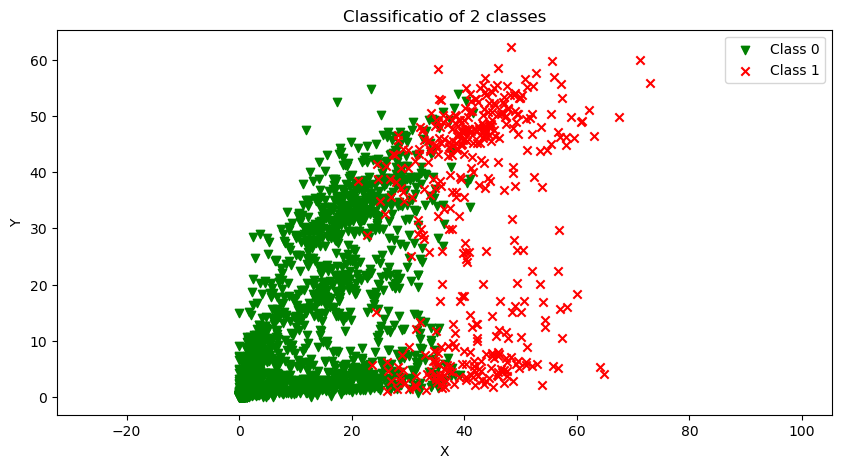

In [106]:
group0 = result_mp[result_mp['mp_app_rank']==0]
group1 = result_mp[result_mp['mp_app_rank']==1]


plt.figure(figsize=(10,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['new_mp_app_vote_percent'],group0['new_party_list_vote_percent'],marker='v',c='g',label='Class 0')
plt.scatter(group1['new_mp_app_vote_percent'],group1['new_party_list_vote_percent'],marker='x',c='r',label='Class 1')
plt.legend(loc='upper right')
plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x = result_mp[['new_mp_app_vote_percent','new_party_list_vote_percent']].values
y = result_mp['mp_app_rank'].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [109]:
#print("X_train shape", x_train.shape)
#print("y_train shape", y_train.shape)
#print("X_test shape", x_test.shape)
#print("y_test shape", y_test.shape)

X_train shape (24059, 2)
y_train shape (24059,)
X_test shape (2674, 2)
y_test shape (2674,)


In [110]:
#Build linear regression model
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

# = theta0 + theta1*x _theta2*y
print("Theta0: ",model_logistic.intercept_[0])
print("Theta1: ",model_logistic.coef_[0][0])
print("Theta2: ",model_logistic.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(model_logistic.intercept_[0],model_logistic.coef_[0][0],model_logistic.coef_[0][1]))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

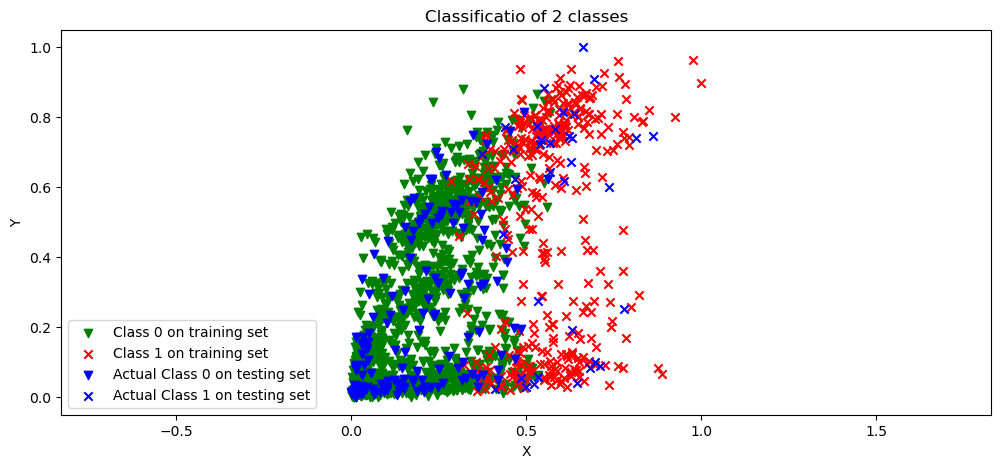

In [ ]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
#plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()

In [ ]:
y_pred = model_logistic.predict(x_train)
#y_pred

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

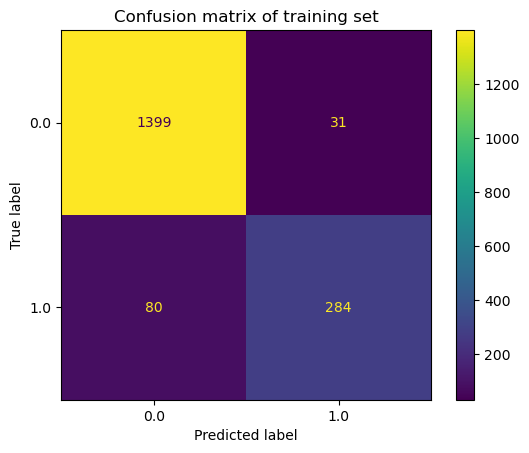

In [26]:
# Plot confusion matrix of training set
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

In [2]:
y_pred = model_logistic.predict(x_test)
y_pred

NameError: name 'model_logistic' is not defined

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       165
         1.0       0.91      0.83      0.87        35

    accuracy                           0.95       200
   macro avg       0.94      0.91      0.92       200
weighted avg       0.95      0.95      0.95       200

Confusion matrix 
[[162   3]
 [  6  29]]


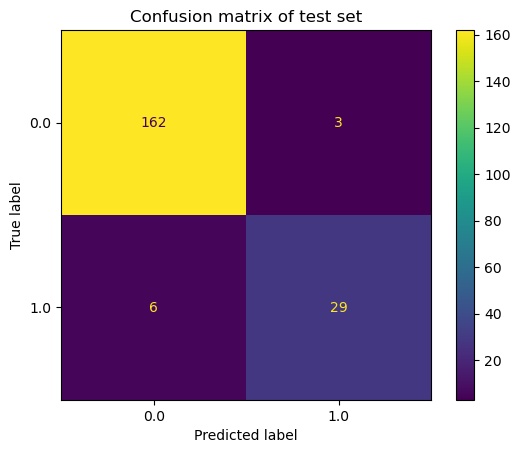

In [43]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(y_test)))
disp.plot()
plt.title('Confusion matrix of test set')
plt.show()